# Neurologisk Klinik - DashBoard
## Predictive Analysis
---

**Synapse Solutions**
```
Team Members:  
- Agnes Rehn 
- Alhaan Kasi
- Guilherme Gryschek
- Nchedochukwu Uzoigwe
- Ning Gai
- Sreeja Nair

```

#### Early detection of the disease and risk prevention

The predictive models will be able to foresee an Alzheimer's diagnosis, making it easier for health care workers to identify risk patients,  which can lead to earlier treatment plans and better patient outcomes. 

### Machine Learning (ML) Task
- Predict Diagnosis of Alzheimer's Disease using NK Dataset

## Set Up
Install Packages

In [272]:
# Install all packages for this script
!pip install numpy pandas skimpy matplotlib sklearn seaborn plotly shap lightgbm xgboost

You should consider upgrading via the 'C:\Users\ggrys\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [273]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
import shap


### Loading Dataset

In [274]:
# Load Data set
# Define a dictionary mapping columns to data types
# Load the dictionary from the text file

df_ml = pd.read_csv("./df_ml.csv", sep=",",true_values =["yes"], false_values=["no"])
df_ml.shape

(2149, 24)

In [275]:
# Checking Variables and Data Types
df_ml.dtypes

Age                        float64
Gender                       int64
EducationLevel               int64
BMI                        float64
Smoking                       bool
AlcoholConsumption         float64
PhysicalActivity           float64
DietQuality                float64
SleepQuality               float64
FamilyHistoryAlzheimers       bool
Diabetes                      bool
Depression                    bool
Hypertension                  bool
CholesterolTotal           float64
MMSE                       float64
ADL                        float64
Diagnosis                     bool
ImpairmentLevel              int64
DependencyLevel              int64
WeightStatus                 int64
Caucasian                     bool
Black                         bool
Asian                         bool
Other                         bool
dtype: object

#### Target Variable
- Diagnosis

#### Feature Variables 

- Age
- Gender
- EducationLevel
- BMI
- Smoking
- AlcoholConsumption
- PhysicalActivity
- DietQuality
- SleepQuality,
- FamilyHistoryAlzheimers
- Diabetes
- Depression 
- Hypertension
- CholesterolTotal
- MMSE
- ADL
- ImpairmentLevel
- DependencyLevel
- WeightStatus
- Ethnicity (Caucasian, Black, Asian, Other)

#### Checking Class Imbalance

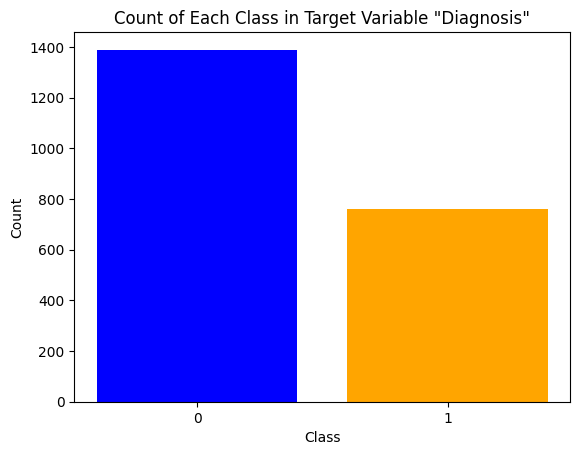

Class 0: Count = 1389, Proportion = 0.6463
Class 1: Count = 760, Proportion = 0.3537


In [276]:
#Creating the arrays for ML
ml_features = df_ml.drop(columns = ["Diagnosis"]).values
ml_target = df_ml["Diagnosis"].values

# Count the occurrences of each class label
unique_classes, class_counts = np.unique(ml_target, return_counts=True)

custom_colors = ['blue', 'orange'] 

# Plot the bar chart
plt.bar(unique_classes, class_counts, color = custom_colors)

# Add title and labels
plt.title('Count of Each Class in Target Variable "Diagnosis"')
plt.xlabel('Class')
plt.ylabel('Count')

# Customize the x-axis labels
plt.xticks([0, 1], ['0', '1'])

# Show the plot
plt.show()

# Count the occurrences of each class
class_counts = np.bincount(ml_target)

# Calculate the proportions of each class
total_instances = len(ml_target)
class_proportions = class_counts / total_instances

# Print the counts and proportions
for class_label, count, proportion in zip(range(len(class_counts)), class_counts, class_proportions):
    print(f"Class {class_label}: Count = {count}, Proportion = {proportion:.4f}")

- **Target Variable shows Class Imbalance**

### Split Dataset -> Train / Test

In [277]:
from sklearn.model_selection import train_test_split

#Random seed to keep reproducibility
RANDOM_SEED = 42

# Split the features and target
X = df_ml.drop('Diagnosis', axis=1)
y = df_ml['Diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

#### Creating ML Models

In [278]:
#Import ML Methods
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [279]:
#Creating the classifier models

models = {
    "DT_1": DecisionTreeClassifier(max_depth=3),
    "DT_2": DecisionTreeClassifier(max_depth=8),
    "RF_1": RandomForestClassifier(n_estimators=10, max_depth=3),
    "RF_2": RandomForestClassifier(n_estimators=15, max_depth=7),
    "KNN_1": KNeighborsClassifier(n_neighbors=3),
    "KNN_2": KNeighborsClassifier(n_neighbors=7),
    "SVM_linear": SVC(kernel='linear'),
    "SVM_rbf": SVC(kernel='rbf', class_weight='balanced'),
    "SVM_poly": SVC(kernel='poly', degree=3, C=1.0),
    "GNB": GaussianNB(),
    "MNB": MultinomialNB(),
    "LogRegr": LogisticRegression(solver='lbfgs'),
    "GB_1": GradientBoostingClassifier(n_estimators=100),
    "XGB_1": XGBClassifier(n_estimators=100, learning_rate=0.1),
    "AdaBoost_1": AdaBoostClassifier(n_estimators=50),
    "ET_1": ExtraTreesClassifier(n_estimators=100)
}

# We can iterate over the dictionary as follows:
for name, classifier in models.items():
    print("Classifier:", name, " ; Sklearn object:", classifier)

Classifier: DT_1  ; Sklearn object: DecisionTreeClassifier(max_depth=3)
Classifier: DT_2  ; Sklearn object: DecisionTreeClassifier(max_depth=8)
Classifier: RF_1  ; Sklearn object: RandomForestClassifier(max_depth=3, n_estimators=10)
Classifier: RF_2  ; Sklearn object: RandomForestClassifier(max_depth=7, n_estimators=15)
Classifier: KNN_1  ; Sklearn object: KNeighborsClassifier(n_neighbors=3)
Classifier: KNN_2  ; Sklearn object: KNeighborsClassifier(n_neighbors=7)
Classifier: SVM_linear  ; Sklearn object: SVC(kernel='linear')
Classifier: SVM_rbf  ; Sklearn object: SVC(class_weight='balanced')
Classifier: SVM_poly  ; Sklearn object: SVC(kernel='poly')
Classifier: GNB  ; Sklearn object: GaussianNB()
Classifier: MNB  ; Sklearn object: MultinomialNB()
Classifier: LogRegr  ; Sklearn object: LogisticRegression()
Classifier: GB_1  ; Sklearn object: GradientBoostingClassifier()
Classifier: XGB_1  ; Sklearn object: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsam

In [280]:
import time
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_models(models, X_train, y_train, X_test, y_test, results_df):
    """
    Evaluates multiple classifiers, recording training time, prediction time, and performance metrics.

    Args:
        models (dict): Dictionary of classifiers with names as keys and model objects as values.
        X_train (pd.DataFrame): Training features.
        y_train (pd.Series): Training labels.
        X_test (pd.DataFrame): Testing features.
        y_test (pd.Series): Testing labels.
        results_df (pd.DataFrame): DataFrame to store the results.
        
    Returns:
        pd.DataFrame: Updated DataFrame with the classifier performance and timings.
    """
    for name, classifier in models.items():
        
        # Step 1: Measure training time
        t_start = time.time()
        classifier.fit(X_train, y_train)
        t_end = time.time()
        training_time = t_end - t_start

        # Step 2: Measure prediction time
        t_start = time.time()
        y_predicted = classifier.predict(X_test)
        t_end = time.time()
        prediction_time = t_end - t_start

        # Step 3: Calculate performance metrics
        accuracy_result = accuracy_score(y_test, y_predicted)
        precision_result = precision_score(y_test, y_predicted, zero_division=1)
        recall_result = recall_score(y_test, y_predicted)
        f1_result = f1_score(y_test, y_predicted)

        # Step 4: Create a DataFrame with this result
        this_result = pd.DataFrame({
                        "classifier_name": [name],
                        "training_time": [training_time],
                        "prediction_time": [prediction_time],
                        "accuracy": [accuracy_result],
                        "precision": [precision_result],
                        "recall": [recall_result],
                        "f1": [f1_result]
                        })

        # Step 5: Append to the results DataFrame
        results_df = pd.concat([results_df, this_result], axis=0, ignore_index=True)
    
    return results_df

In [281]:
# Test ML Model keeping Class Imbalance

# Initialize an empty DataFrame for storing results
results_ml_1 = pd.DataFrame(columns=["classifier_name", "training_time", "prediction_time", "accuracy", "precision", "recall", "f1"])

# Call the function to evaluate all models
results_ml_1 = evaluate_models(models, X_train, y_train, X_test, y_test, results_ml_1)

#Time Metrics
classifier_summary_1 = results_ml_1.groupby(by=["classifier_name"]).first()

# Create new features
classifier_summary_1["total_time"] = classifier_summary_1["training_time"] + classifier_summary_1["prediction_time"]

C:\Users\ggrys\AppData\Local\Temp\ipykernel_28732\87667221.py:52: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, this_result], axis=0, ignore_index=True)
c:\Users\ggrys\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ggrys\Ap

In [282]:
import matplotlib.pyplot as plt 
import pandas as pd

def plot_model_results(results_df):
    """
    Plots the timing and performance metrics for classifiers with their names as labels.
    Also displays a summary table with all metrics below the charts.

    Args:
        results_df (pd.DataFrame): DataFrame containing the classifiers' performance and timing metrics.
                                   The index should be set to classifier names for proper labeling.
    """
    
    # Ensure that the classifier names are used as index
    classifiers = results_df['classifier_name'] if 'classifier_name' in results_df.columns else results_df.index

    # Plot timing metrics in a single chart
    cols_timing = ["training_time", "prediction_time"]

    # Create a grouped bar plot for timing metrics
    ax = results_df[cols_timing].plot.bar(
        figsize=(10, 6),
        color=['#FF5733', '#33FF57'],  # Custom colors for clarity
        width=0.8
    )
    
    # Set classifier names as tick labels for timing plots
    ax.set_xticklabels(classifiers, rotation=45, ha="right")  # Rotate labels for better readability

    # Main labels for timing plot
    plt.title("Time Taken per Classifier", fontsize=16)
    plt.xlabel("Classifier", fontsize=12)
    plt.ylabel("Time (s)", fontsize=12)
    plt.legend(title='Metrics', fontsize=10)  # Show legend for training and prediction time
    plt.tight_layout()
    plt.show()

    # Plot performance metrics
    cols_performance = ["accuracy", "precision", "recall", "f1"]

    # Create a bar plot for performance metrics
    ax2 = results_df[cols_performance].plot.bar(
        subplots=False,
        cmap="viridis",
        figsize=(10, 6),
        legend=True
    )
    
    # Set classifier names as tick labels for performance plot
    ax2.set_xticklabels(classifiers, rotation=45, ha="right")  # Rotate labels for better readability

    # Main labels for performance plot
    plt.title("Predictive Performance per Classifier", fontsize=16)
    plt.xlabel("Classifier", fontsize=12)
    plt.ylabel("Performance Metrics", fontsize=12)
    plt.legend(bbox_to_anchor=(1, 1))  # Show legend outside the chart
    plt.tight_layout()
    plt.show()

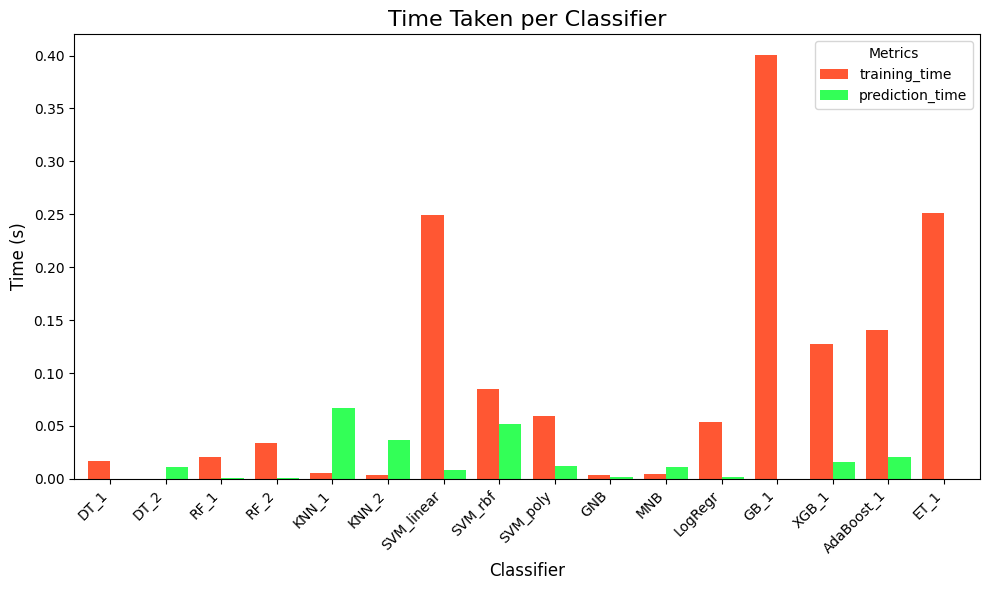

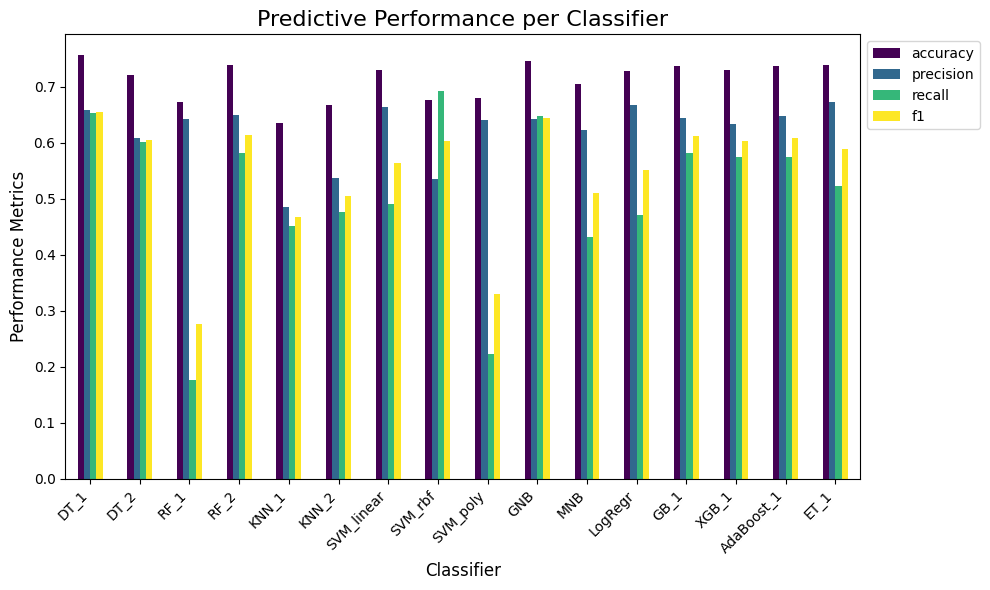

,training_time,prediction_time,accuracy,precision,recall,f1,total_time
classifier_name,,,,,,,
AdaBoost_1,0.140788,0.020194,0.737209,0.647059,0.575163,0.608997,0.160981
DT_1,0.016677,0.000000,0.755814,0.657895,0.653595,0.655738,0.016677
DT_2,0.000000,0.010921,0.720930,0.609272,0.601307,0.605263,0.010921
ET_1,0.251084,0.000000,0.739535,0.672269,0.522876,0.588235,0.251084
GB_1,0.400030,0.000000,0.737209,0.644928,0.581699,0.611684,0.400030
GNB,0.003190,0.002010,0.746512,0.642857,0.647059,0.644951,0.005201
KNN_1,0.005243,0.066764,0.634884,0.485915,0.450980,0.467797,0.072007
KNN_2,0.003826,0.036702,0.667442,0.536765,0.477124,0.505190,0.040528
LogRegr,0.053539,0.001368,0.727907,0.666667,0.470588,0.551724,0.054908


In [283]:
#Ploting classifier evaluation results
plot_model_results(results_ml_1)

classifier_summary_1

To enhance model performance, we will apply the Synthetic Minority Over-sampling Technique (SMOTE) to address class imbalance. SMOTE generates synthetic samples for the minority class, helping to balance class distribution and reduce bias toward the majority class. This approach improves predictive accuracy and generalization, especially in scenarios where the minority class is underrepresented.

#### SMOTE: synthetic minority over-sampling technique

In [285]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=RANDOM_SEED)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

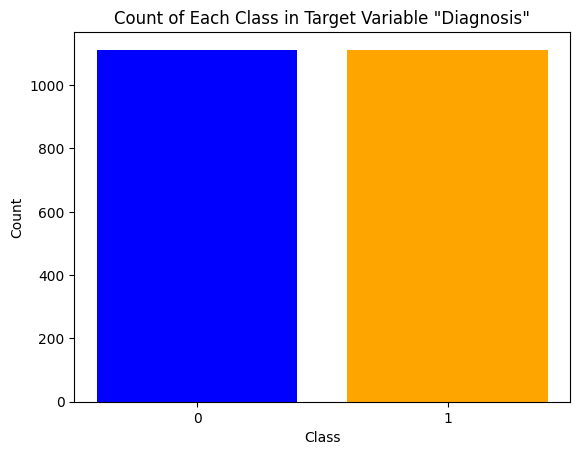

Class 0: Count = 1112, Proportion = 0.5000
Class 1: Count = 1112, Proportion = 0.5000


In [286]:
# Check the distribution of the target variable after oversampling
unique_classes, class_counts = np.unique(y_train_smote, return_counts=True)

custom_colors = ['blue', 'orange'] 

# Plot the bar chart
plt.bar(unique_classes, class_counts, color = custom_colors)

# Add title and labels
plt.title('Count of Each Class in Target Variable "Diagnosis"')
plt.xlabel('Class')
plt.ylabel('Count')

# Customize the x-axis labels
plt.xticks([0, 1], ['0', '1'])

# Show the plot
plt.show()

# Count the occurrences of each class
class_counts = np.bincount(y_train_smote)

# Calculate the proportions of each class
total_instances = len(y_train_smote)
class_proportions = class_counts / total_instances

# Print the counts and proportions
for class_label, count, proportion in zip(range(len(class_counts)), class_counts, class_proportions):
    print(f"Class {class_label}: Count = {count}, Proportion = {proportion:.4f}")

In [287]:
# Test ML Model after applying SMOTE technique to solve Class Imbalance

# Initialize an empty DataFrame for storing results
results_ml_2 = pd.DataFrame(columns=["classifier_name", "training_time", "prediction_time", "accuracy", "precision", "recall", "f1"])

# Call the function to evaluate all models
results_ml_2 = evaluate_models(models, X_train_smote, y_train_smote, X_test, y_test, results_ml_2)

#Time Metrics
classifier_summary_2 = results_ml_2.groupby(by=["classifier_name"]).first()

# Create new features
classifier_summary_2["total_time"] = classifier_summary_2["training_time"] + classifier_summary_2["prediction_time"]

C:\Users\ggrys\AppData\Local\Temp\ipykernel_28732\87667221.py:52: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, this_result], axis=0, ignore_index=True)
c:\Users\ggrys\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ggrys\Ap

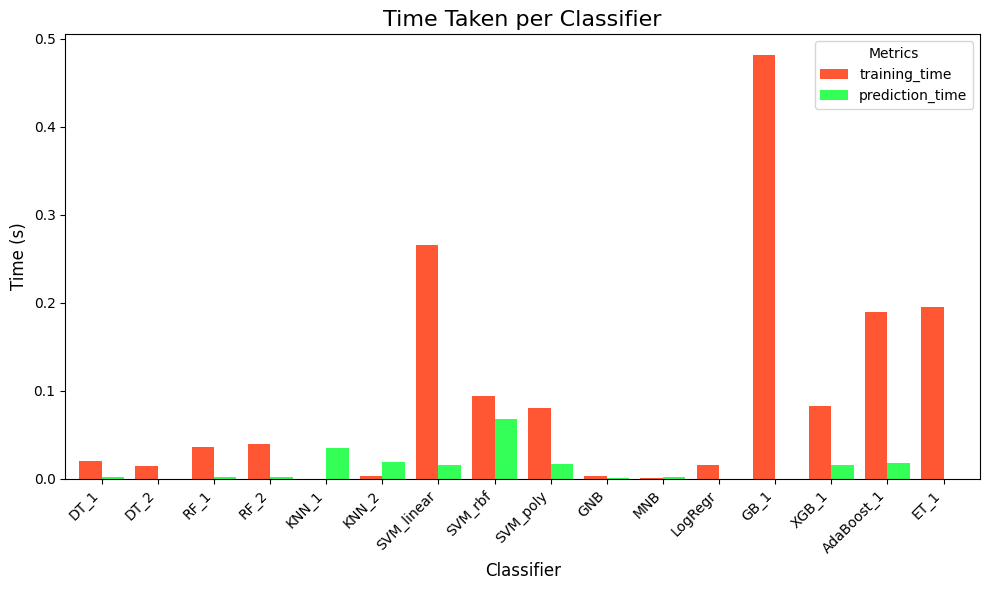

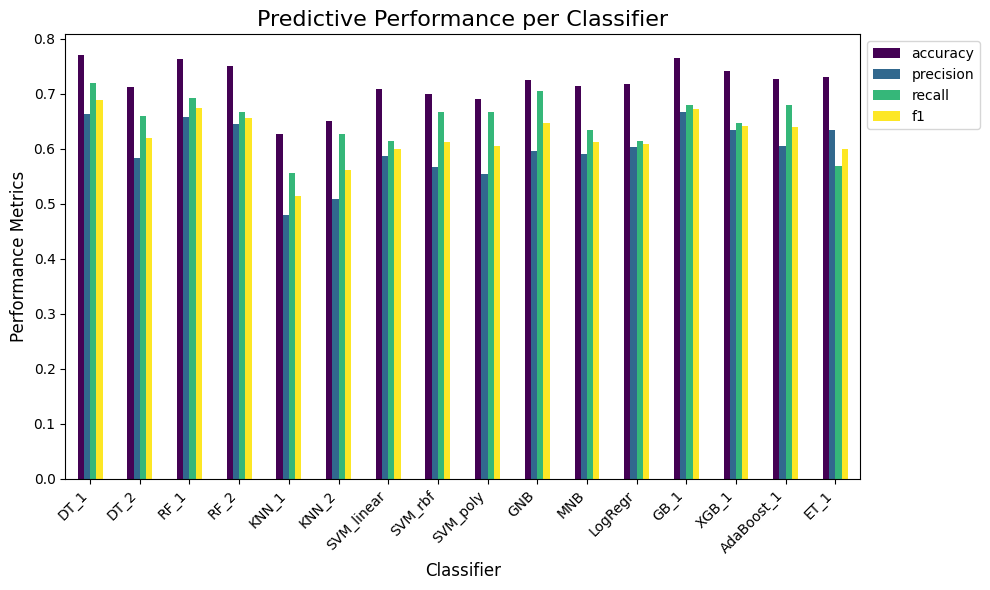

,training_time,prediction_time,accuracy,precision,recall,f1,total_time
classifier_name,,,,,,,
AdaBoost_1,0.190075,0.018066,0.727907,0.604651,0.679739,0.640000,0.208141
DT_1,0.020641,0.002010,0.769767,0.662651,0.718954,0.689655,0.022650
DT_2,0.015007,0.000000,0.711628,0.583815,0.660131,0.619632,0.015007
ET_1,0.195481,0.000000,0.730233,0.635036,0.568627,0.600000,0.195481
GB_1,0.481214,0.000000,0.765116,0.666667,0.679739,0.673139,0.481214
GNB,0.003005,0.000991,0.725581,0.596685,0.705882,0.646707,0.003995
KNN_1,0.000000,0.035489,0.627907,0.480226,0.555556,0.515152,0.035489
KNN_2,0.002991,0.019260,0.651163,0.507937,0.627451,0.561404,0.022251
LogRegr,0.016235,0.000000,0.718605,0.602564,0.614379,0.608414,0.016235


In [288]:
#Ploting classifier evaluation results
plot_model_results(results_ml_2)

classifier_summary_2

#### Selecting the Best Model

In [289]:
# Step 1: Identify the best model based on the highest F1 score
best_model_name = classifier_summary_2['f1'].idxmax()  # Model with the highest F1 score
best_model_1 = models[best_model_name]  # Retrieve the corresponding model

# Step 2: Print all the metrics for the best model
print(f"The best model is: {best_model_name} with the following metrics:")
print(classifier_summary_2.loc[best_model_name, ["accuracy", "precision", "recall", "f1"]])

The best model is: DT_1 with the following metrics:
accuracy     0.769767
precision    0.662651
recall       0.718954
f1           0.689655
Name: DT_1, dtype: float64


In [290]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def plot_roc_curve(model, X_test, y_test):
    """
    Plots the ROC curve and calculates the AUC score for a binary classification model.

    Args:
        model: Trained model (must support `predict_proba`).
        X_test (pd.DataFrame or np.array): Test set features.
        y_test (pd.Series or np.array): True labels for the test set.
    
    Returns:
        float: The AUC score of the model.
    """
    # Step 1: Predict the probabilities for the positive class
    y_prob = model.predict_proba(X_test)[:, 1]  # Get the probability for class 1
    
    # Step 2: Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    
    # Step 3: Calculate AUC (Area Under the Curve)
    auc_score = roc_auc_score(y_test, y_prob)
    print(f"AUC Score: {auc_score:.2f}")
    
    # Step 4: Plot the ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc_score:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random chance
    
    # Add labels and title
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    
    # Show the plot
    plt.show()
    
    return auc_score

AUC Score: 0.80


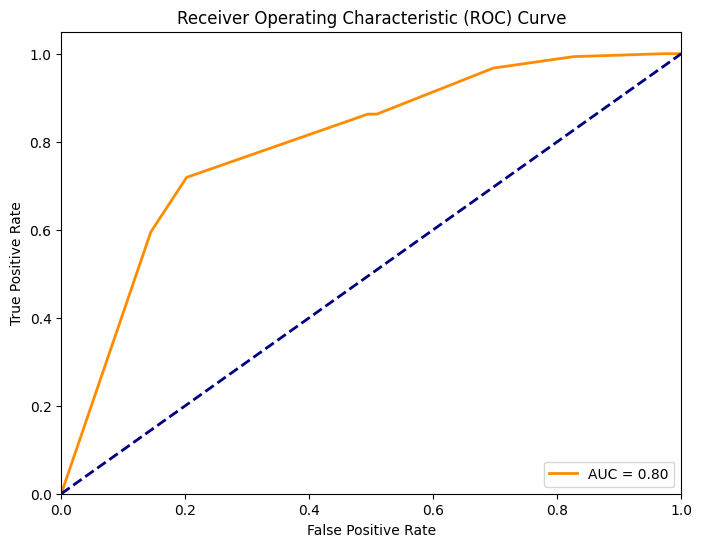

0.796606970104528

In [291]:
plot_roc_curve(best_model_1, X_test, y_test)

### Checking for Feature Importance for Model training

                    Feature  Importance
15                      ADL    0.176512
14                     MMSE    0.104186
0                       Age    0.000000
12             Hypertension    0.000000
21                    Asian    0.000000
20                    Black    0.000000
19                Caucasian    0.000000
18             WeightStatus    0.000000
17          DependencyLevel    0.000000
16          ImpairmentLevel    0.000000
13         CholesterolTotal    0.000000
11               Depression    0.000000
1                    Gender    0.000000
10                 Diabetes    0.000000
9   FamilyHistoryAlzheimers    0.000000
8              SleepQuality    0.000000
7               DietQuality    0.000000
6          PhysicalActivity    0.000000
5        AlcoholConsumption    0.000000
4                   Smoking    0.000000
3                       BMI    0.000000
2            EducationLevel    0.000000
22                    Other    0.000000


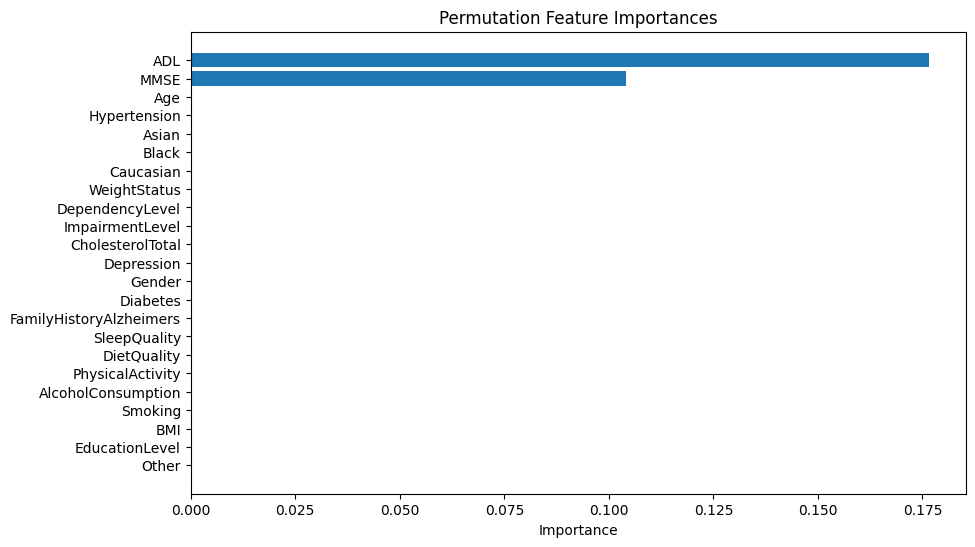

In [292]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
perm_importance = permutation_importance(best_model_1, X_test, y_test, n_repeats=10, random_state=42)

# Create a DataFrame for the feature importances
importance_df = pd.DataFrame({
    'Feature': data_input_template,
    'Importance': perm_importance.importances_mean
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Permutation Feature Importances')
plt.show()

In [293]:
# Set a threshold for feature selection: the Models will be retrained using the most important features
threshold = 0.01  # Select features with importance > 0.01

# Step 2: Filter the features that have importance above the threshold
important_features = importance_df[importance_df['Importance'] > threshold]['Feature'].values

The models will be trained again, using just the most important features for prediction

In [294]:
# Select the important features from the training and testing datasets
X_train_filtered = X_train_smote[important_features]
X_test_filtered = X_test[important_features]

# Retrain the model with the filtered datasets
#best_model.fit(X_train_filtered, y_train)

In [295]:
# Initialize an empty DataFrame for storing results
results_ml_3 = pd.DataFrame(columns=["classifier_name", "training_time", "prediction_time", "accuracy", "precision", "recall", "f1"])

# Call the function to evaluate all models
results_ml_3 = evaluate_models(models, X_train_filtered, y_train_smote, X_test_filtered, y_test, results_ml_3)

#Time Metrics
classifier_summary_3 = results_ml_3.groupby(by=["classifier_name"]).first()

# Create new features
classifier_summary_3["total_time"] = classifier_summary_3["training_time"] + classifier_summary_3["prediction_time"]

C:\Users\ggrys\AppData\Local\Temp\ipykernel_28732\87667221.py:52: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, this_result], axis=0, ignore_index=True)
c:\Users\ggrys\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


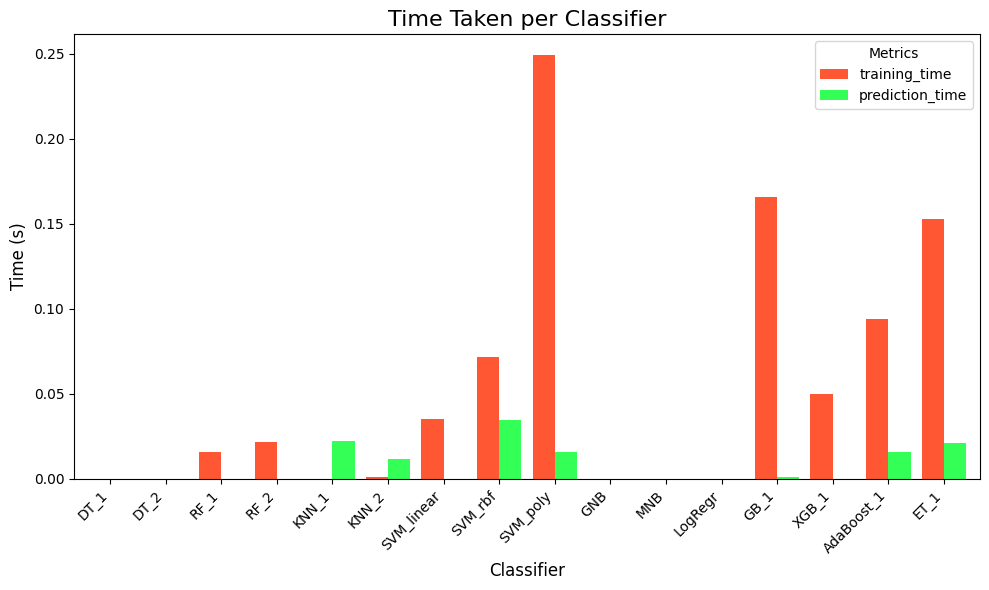

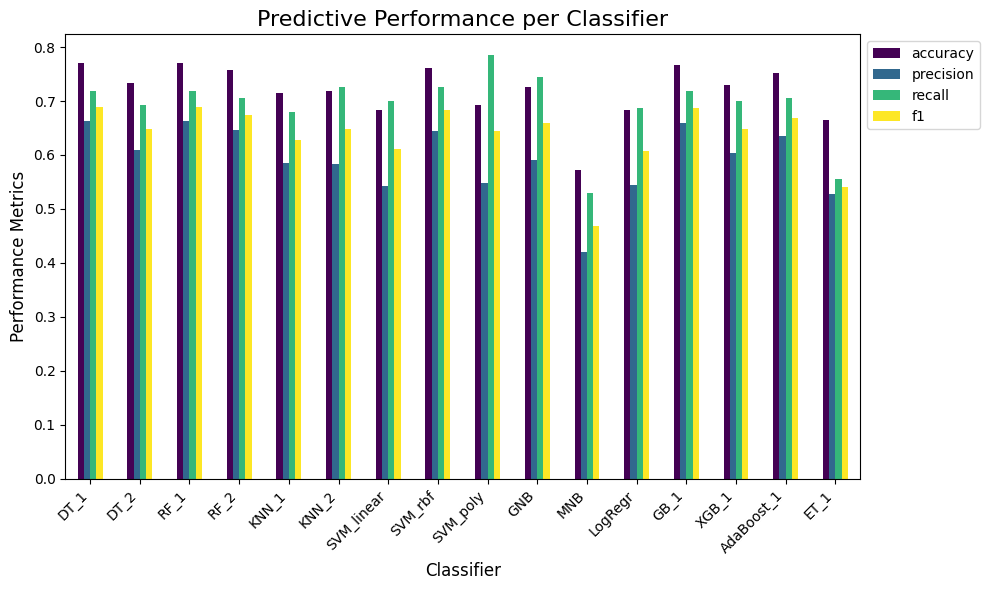

,classifier_name,training_time,prediction_time,accuracy,precision,recall,f1
0,DT_1,0.000000,0.000000,0.769767,0.662651,0.718954,0.689655
1,DT_2,0.000000,0.000000,0.732558,0.609195,0.692810,0.648318
2,RF_1,0.015625,0.000000,0.769767,0.662651,0.718954,0.689655
3,RF_2,0.021812,0.000000,0.758140,0.646707,0.705882,0.675000
4,KNN_1,0.000000,0.022447,0.713953,0.584270,0.679739,0.628399
5,KNN_2,0.001002,0.011759,0.718605,0.584211,0.725490,0.647230
6,SVM_linear,0.035089,0.000000,0.683721,0.543147,0.699346,0.611429
7,SVM_rbf,0.071769,0.034808,0.760465,0.645349,0.725490,0.683077
8,SVM_poly,0.248887,0.016054,0.693023,0.547945,0.784314,0.645161
9,GNB,0.000000,0.000000,0.725581,0.590674,0.745098,0.658960


In [296]:
plot_model_results(results_ml_3)

results_ml_3

In [297]:
# Step 1: Identify the best model based on the highest F1 score
best_model_name = classifier_summary_3['f1'].idxmax()  # Model with the highest F1 score
best_model_2 = models[best_model_name]  # Retrieve the corresponding model

# Step 2: Print all the metrics for the best model
print(f"The best model is: {best_model_name} with the following metrics:")
print(classifier_summary_3.loc[best_model_name, ["accuracy", "precision", "recall", "f1"]])

The best model is: DT_1 with the following metrics:
accuracy     0.769767
precision    0.662651
recall       0.718954
f1           0.689655
Name: DT_1, dtype: float64


AUC Score: 0.79


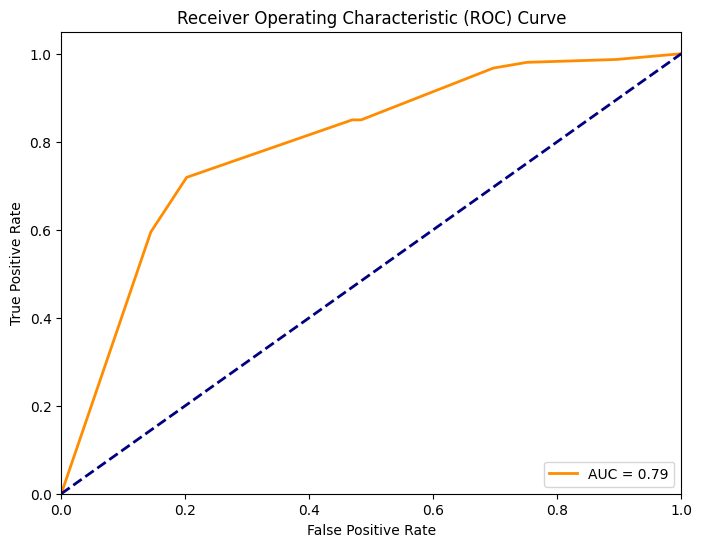

0.7949788820461999

In [303]:
plot_roc_curve(best_model_2, X_test_filtered, y_test)

### Export Model

In [298]:
import pickle
# Export the best model using pickle
with open(f'best_model.pkl', 'wb') as model_file:
    pickle.dump(best_model_2, model_file)

print(f"Model '{best_model_name}' has been saved as 'best_model.pkl'.")

Model 'DT_1' has been saved as 'best_model.pkl'.


### SHAP NOT READY YET -> BUT THE BEST MODEL CAN BE EXPORTED 

In [299]:
"""
import shap

# Initialize the SHAP explainer for the best model
explainer = shap.Explainer(best_model_2, X_test_filtered)

# Calculate SHAP values, with additivity check disabled
shap_values = explainer(X_test_filtered, check_additivity=False)

# Ensure that the feature names from X_test_filtered are correctly provided
feature_names = X_test_filtered.columns if hasattr(X_test_filtered, 'columns') else None

# Plot SHAP values or summary
shap.summary_plot(shap_values, X_test_filtered, feature_names=feature_names)
"""

"\nimport shap\n\n# Initialize the SHAP explainer for the best model\nexplainer = shap.Explainer(best_model_2, X_test_filtered)\n\n# Calculate SHAP values, with additivity check disabled\nshap_values = explainer(X_test_filtered, check_additivity=False)\n\n# Ensure that the feature names from X_test_filtered are correctly provided\nfeature_names = X_test_filtered.columns if hasattr(X_test_filtered, 'columns') else None\n\n# Plot SHAP values or summary\nshap.summary_plot(shap_values, X_test_filtered, feature_names=feature_names)\n"

### STILL SIMULATING PREDICTION TASKS -> NOT READY

### Prediction Task

In [300]:
import pickle
import numpy as np
import pandas as pd

# Step 1: Load the saved model from the pickle file
with open('best_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

In [307]:
import pandas as pd

def predict_diagnosis(new_data: list, model, scaler):
    """Predict diagnosis using the Random Forest model.

    Args:
        new_data (list): List of new data input (ADL, MMSE).
        model: Trained Random Forest model.
        scaler: Scaler used for training.

    Returns:
        str: Prediction result.
    """
    # Convert new data to DataFrame for consistency with the model's feature names
    new_data_df = pd.DataFrame([new_data], columns=['ADL', 'MMSE'])
    
    # Scale the new data
    new_data_scaled = scaler.transform(new_data_df)

    # Debugging prints
    print(f"New Data: {new_data_df}")  # Print the new data input
    print(f"Scaled Data: {new_data_scaled}")  # Print the scaled data
    
    # Perform prediction
    prediction_prob = model.predict_proba(new_data_scaled)[:, 1]  # Get the probability for class 1
    
    # Debugging print for prediction probabilities
    print(f"Prediction Probabilities: {prediction_prob}")  # Print the prediction probabilities

    # Return the probability for class 1
    return prediction_prob[0]  # Returning the probability for class 1

New Data:    ADL  MMSE
0   10    22
Scaled Data: [[32.7481841  78.17195956]]
Prediction Probabilities: [0.05228758]
Prediction Probability for Class 1: 0.05228758169934641


c:\Users\ggrys\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [308]:
# Example usage:
# Assuming model and scaler are loaded

new_data = [2, 5]  # Example input (ADL, MMSE)
result = predict_diagnosis(new_data, best_model, scaler)
print("Prediction Probability for Class 1:", result)

New Data:    ADL  MMSE
0    2     5
Scaled Data: [[ 5.27659569 16.45652913]]
Prediction Probabilities: [0.05228758]
Prediction Probability for Class 1: 0.05228758169934641


c:\Users\ggrys\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
